# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [16]:
help(get_fremont_data)

Help on function get_fremont_data in module data:

get_fremont_data(filename='Fremont.csv', url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', force_download=False)
    Download and cache the fremont data
    
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data



In [3]:
from data import get_fremont_data
data = get_fremont_data()

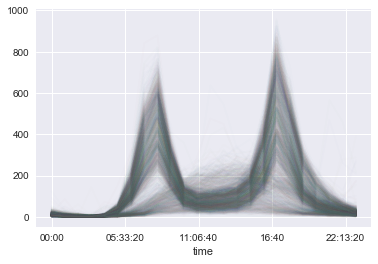

In [4]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

In [5]:
X = pivoted.fillna(0).T.values
X.shape

(2128, 24)

In [6]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2128, 2)

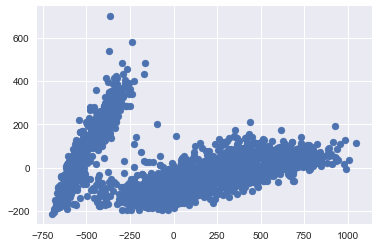

In [7]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [8]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

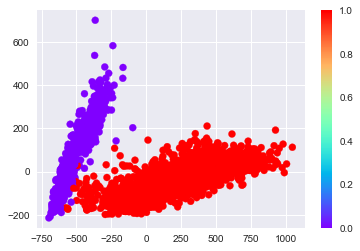

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

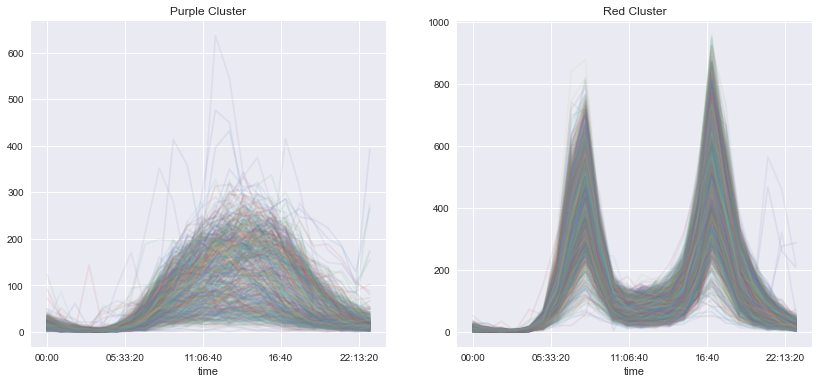

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [11]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

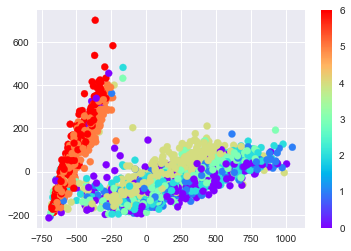

In [12]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [13]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
               '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', length=1469, freq=None)